<a href="https://colab.research.google.com/github/slashssab/piecewise-smooth-ode/blob/main/introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The following paper shows several ways to analyze and vizualize pierce-wise smooth problems given by LTI systems. We will use well known python packages like:
- scipy
- numpy

to provide tools concerning stability and periodic behaviors of concidered systems. Let us bring a following example of the LTI system with switching:
$$\ddot{\theta}=A\theta + \mathcal{T}$$
where
$$\mathcal{T} = \begin{cases}
     B \theta + C \dot{\theta},& \text{if }  |\theta|\geq \theta_0\\
    0,              & \text{otherwise}
\end{cases},$$
where $\theta_0$ is fixed border value of $\theta$ where switching is trigered. Most software tools offering solving ODEs accepts problems defined as the first order differential equations in a following form:
 $$\dot{x} = f(x),$$
 where $x$ is a function of time. Having hnown that fact we have to transform equation:
 $$\ddot{\theta}=A\theta + \mathcal{T}$$
 to the first order representation using Jacobian:
 $$
    \ddot{\theta}=A\theta \Rightarrow \dot{x}=L_1 x,$$ 

where $x$ is a state vector:
$$x = \begin{bmatrix}
\theta \\
\dot{\theta}
\end{bmatrix},$$
and $L_1$ is Jacobian:
$$L_1=\begin{bmatrix}
0 & 1\\
A & 0 
\end{bmatrix}.$$
The same can be applied for the system with control:
$$
    \ddot{\theta}=A\theta+B\theta+C\dot{\theta} \Rightarrow \dot{x}=L_2 x, 
$$
where
$$L_2=\begin{bmatrix}
0 & 1\\
A+B & C 
\end{bmatrix}.$$
Problem defined as above will be an example for our consideration.

# Implementation
Before we get started we have to import necessary packages

In [3]:
import numpy as np
from scipy.integrate import odeint


## defining variables
We define constants $A$, $B$ and $C$ form our example:

In [18]:
A = 0.5
B = -0.7
C = 0

and Jacobians $L_1$ and $L_2$:


In [19]:
L1 = np.array([[0,1],[0.5, 0]])
L2 = np.array([[0,1],[0.5 + B , C]])

Having defined those elements we can define our problm with switching by using particular jacobian in dependence of a defined condition. In our case: 
$$|\theta| \ge \theta_0,$$
functionlooks as follows:

In [20]:
def func(y, t, Ain, Aout, theta_0): 
    if abs(y[0])>theta_0:
        return np.dot(Aout,y)
    else:
        return np.dot(Ain,y)

## Initial value problem
Now we define the initial problem for our system:
- IVP $$\begin{bmatrix}
\theta \\
\dot{\theta}
\end{bmatrix}= \begin{bmatrix}
1 \\
1
\end{bmatrix}$$
- time of simuation $T=20$, $N=1000$ samples
- $\theta_0 = 1$



In [21]:
ivp = np.array([1,1])
theta_0 = 1
T = 20
N = 1000
tspan = np.linspace(0, T, N) 

and run the simulation

In [22]:
args = (L1,L2,theta_0)
y = odeint(func,ivp,tspan,args=args)

## Results
Now we can observe simulation results on a phase portrait 

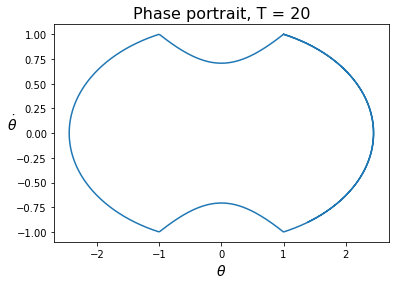

In [26]:
from matplotlib import pyplot
pyplot.title('Phase portrait, T = {0}'.format(T), fontsize=16)
pyplot.xlabel(r'$\theta$', fontsize=14)
pyplot.ylabel(r'$\dot{\theta}$', rotation = 0, fontsize=14)
pyplot.plot(y[:,0], y[:,1])
pyplot.show()